In [16]:
# Libraries
import pandas as pd
import numpy as np

In [12]:
# read the datase into pandas to observe the dataset
ads_df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv',index_col=0)
ads_df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [13]:
data.shape

(200, 4)

The imported dataset incldes 200 observations, 4 variables.

According to the original data source - **TV**, **radio** and **newspaper** columns refer to 1000s of US dollars spent on advertisement through respective channels, where as **sales** is the amount in 1000s USD of income generated. Thus the advertisement channels will be used as *features* and the sales variable will be the *responce* in our dataset.

Each observation of 200 in this dataset represents a single market.

Because this is a continuous dataset Liner regression model should be a fitting choice.

In [15]:
ads_df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Looking at the data TV is the most expencive channel of advertisement.

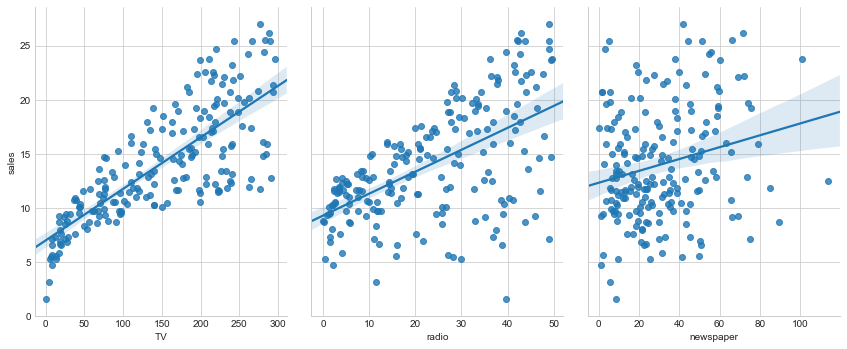

In [26]:
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

# Visualising relationship between each of features and the responce variables
# using an inbuilt seaborn function Pairplot which prints multiple distribution plots
# of each feature and the responce.
sns.pairplot(ads_df, x_vars = ['TV','radio','newspaper'], y_vars = 'sales', size = 5, aspect = 0.8, kind = 'reg');

# Preparing data for the model

Assign data to the feature matrix 'X' and the responce vectore 'y'.

In [35]:
# Identify feature columns
features = ["TV","radio","newspaper"]

# Create a subset of data as feature matrix
X = ads_df[features]
# Assign responce vector, it will have to be a numPy array
y = ads_df['sales']

(200,)

Split X and y into train and test functions

In [41]:
from sklearn.model_selection import train_test_split
# Split data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1)

In [42]:
# Verify
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


# Linear Regression model

In [43]:
from sklearn.linear_model import LinearRegression
# instantiate
linreg = LinearRegression()
# fit the model
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Interpreting model coefficients

In [44]:
print(linreg.intercept_)
print(linreg.coef_)

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [46]:
# pair the feature names with the coefficients
list(zip(features, linreg.coef_))

[('TV', 0.046564567874150281),
 ('radio', 0.17915812245088836),
 ('newspaper', 0.0034504647111804347)]